In [2]:
# !pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as KMeans, DBSCAN as DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve, classification_report
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

import scikitplot as skplt


from sklearn.pipeline import Pipeline
sns.set()
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
# lets import our data
# /content/drive/MyDrive/data.csv
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
# find the number of nan in the original dataset
df.isna().sum().sum()
# 4,914,430

4914430

In [ ]:
df.size
# 8,925,150

8925150

In [ ]:
# so there are 4914430 / 8925150 * 100 missing values in the original dataframe
print((df.isna().sum().sum()) / (df.size) * 100)

# great! 55 percent of the values in the dataframe are NaN

55.06271603278377


as there are 18,000 rows in the dataset with null value for GDP, rather than introduce bias by imputing the target (class) for each row, drop them



In [ ]:
gdp_col = 'owid_gdp_per_capita'

In [ ]:
df = df[df[gdp_col].notna()]
# for the imputation, try without droping class col is null,

In [ ]:
df # still huge im ok with it 46489 rows × 138 columns

,iso_code,country,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,...,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_retail_and_recreation,google_mobility_change_residential,google_mobility_change_workplaces,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,sdsn_effective_reproduction_rate_smoothed,sdsn_positive_test_rate_smoothed,sdsn_overall_transmission
72,ABW,Aruba,2020-03-13,NaN,NaN,NaN,2.0,2.0,NaN,0.0,...,-4.0,-5.0,-10.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
78,ABW,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-41.0,-40.0,-52.0,21.0,-40.0,NaN,NaN,NaN,NaN,NaN
79,ABW,Aruba,2020-03-20,NaN,NaN,NaN,4.0,2.0,NaN,0.0,...,-41.0,-45.0,-53.0,22.0,-41.0,NaN,NaN,NaN,NaN,NaN
80,ABW,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-52.0,-54.0,-62.0,21.0,-40.0,NaN,NaN,NaN,NaN,NaN
81,ABW,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-52.0,-62.0,-70.0,NaN,-46.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,ZWE,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,237.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.273500,0.033571,NaN,0.023,1.0
64671,ZWE,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,242.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.355214,0.057571,NaN,0.025,1.0
64672,ZWE,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,242.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.340786,0.057571,NaN,0.023,1.0
64673,ZWE,Zimbabwe,2020-10-29,8349.0,242.0,7864.0,8320.0,5.0,242.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.273500,0.052786,NaN,0.023,1.0


Create a high correlation filter on the dataset

do not include the dependent variable (class)

Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping one of those variables.

In [ ]:
# df.corr()

In [ ]:
# sns.set()
# plt.rcParams["figure.figsize"] = (35,35)
# sns.heatmap(df.corr(), annot=True)
# plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['jhu_deaths',
 'jhu_recovered',
 'owid_total_cases',
 'owid_new_cases',
 'owid_total_deaths',
 'owid_total_tests',
 'owid_new_tests',
 'owid_new_tests_smoothed',
 'owid_new_tests_per_thousand',
 'owid_new_tests_smoothed_per_thousand',
 'owid_weekly_excess_mortality_p_score',
 'owid_weekly_excess_mortality_p_score_75_84',
 'owid_weekly_excess_mortality_p_score_85plus',
 'owid_weekly_deaths_2019',
 'owid_weekly_deaths_2018',
 'owid_weekly_deaths_2017',
 'owid_weekly_deaths_2016',
 'owid_weekly_deaths_2015',
 'owid_avg_weekly_deaths_2015_2019',
 'owid_population',
 'owid_aged_65_older',
 'owid_aged_70_older',
 'owid_life_expectancy',
 'ox_c1_school_closing',
 'ox_c2_workplace_closing',
 'ox_c3_cancel_public_events',
 'ox_c5_flag',
 'ox_confirmed_cases',
 'ox_confirmed_deaths',
 'ox_stringency_index',
 'ox_stringency_index_for_display',
 'ox_stringency_legacy_index',
 'ox_stringency_legacy_index_for_display',
 'ox_government_response_index',
 'ox_government_response_index_for_display',
 '

In [ ]:
len(to_drop)

89

In [ ]:
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
df

,iso_code,jhu_confirmed,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests_per_thousand,owid_tests_per_case,owid_positive_rate,...,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_workplaces,sdsn_new_deaths_per_million_smoothed,sdsn_overall_transmission,Y
72,0,NaN,0.0,18.733,18.733,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,40.0,-4.0,-5.0,3.0,NaN,NaN,D
78,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.0,-41.0,-40.0,-40.0,NaN,NaN,D
79,0,NaN,0.0,37.465,18.733,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,-7.0,-41.0,-45.0,-41.0,NaN,NaN,D
80,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-19.0,-52.0,-54.0,-40.0,NaN,NaN,D
81,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-36.0,-52.0,-62.0,-46.0,NaN,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,183,8303.0,1.0,556.822,0.471,15.946,0.067,9.221,43.411,0.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033571,1.0,A
64671,183,8315.0,5.0,558.638,1.817,16.282,0.336,9.292,40.688,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0,A
64672,183,8320.0,0.0,559.446,0.807,16.282,0.000,9.330,43.969,0.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0,A
64673,183,8349.0,0.0,559.782,0.336,16.282,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052786,1.0,A


In [ ]:
df.isnull().sum() * 100 / len(df)

iso_code                                    0.000000
jhu_confirmed                               5.962701
owid_new_deaths                             1.374519
owid_total_cases_per_million                7.485642
owid_new_cases_per_million                  1.374519
                                             ...    
google_mobility_change_transit_stations    34.350061
google_mobility_change_workplaces          32.949730
sdsn_new_deaths_per_million_smoothed        3.456732
sdsn_overall_transmission                  50.665749
Y                                           0.000000
Length: 62, dtype: float64

# Imputation

# try different methods see how they would perform

In [ ]:
# change ISO from text categorical to numeric index
# change iso code from categorical to numeric index
df['iso_code'] = pd.factorize(df['iso_code'])[0]
df

,iso_code,country,date,jhu_confirmed,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests_per_thousand,...,yougov_stopping_sending_children,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_workplaces,sdsn_new_deaths_per_million_smoothed,sdsn_overall_transmission
72,0,Aruba,2020-03-13,NaN,0.0,18.733,18.733,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,40.0,-4.0,-5.0,3.0,NaN,NaN
78,0,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-5.0,-41.0,-40.0,-40.0,NaN,NaN
79,0,Aruba,2020-03-20,NaN,0.0,37.465,18.733,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,-7.0,-41.0,-45.0,-41.0,NaN,NaN
80,0,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-19.0,-52.0,-54.0,-40.0,NaN,NaN
81,0,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-36.0,-52.0,-62.0,-46.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,183,Zimbabwe,2020-10-26,8303.0,1.0,556.822,0.471,15.946,0.067,9.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033571,1.0
64671,183,Zimbabwe,2020-10-27,8315.0,5.0,558.638,1.817,16.282,0.336,9.292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0
64672,183,Zimbabwe,2020-10-28,8320.0,0.0,559.446,0.807,16.282,0.000,9.330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0
64673,183,Zimbabwe,2020-10-29,8349.0,0.0,559.782,0.336,16.282,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052786,1.0


In [ ]:
# then, drop non-numerics
drop_cols = [gdp_col]
# drop_cols = []

# don't have to drop iso_code anymore, i made it a numerical category
drop_cols.extend(['date','country','owid_tests_units'])

df.drop(drop_cols, axis=1, inplace=True)

In [ ]:
df.isna().sum().sum()

1017530

In [ ]:
# imputation
# imputer = IterativeImputer()

# define imputer
imputer = KNNImputer(n_neighbors=15, weights='distance', metric='nan_euclidean')

In [ ]:
# first, remove the class column
X = df.loc[:, df.columns != 'Y']

# fit to the entire set
imputer.fit(X)

KNNImputer(n_neighbors=15, weights='distance')

In [ ]:
# transform the dataset
Xtrans = imputer.transform(X)

In [ ]:
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 0


In [ ]:
# # scale the data, this is only needed for knn
# #
# trans = StandardScaler()
# Xtrans = trans.fit_transform(Xtrans)
# ##
# # ONLY NEEDED FOR KNN ^

In [ ]:
# now, instead of scaling, we will normalize the data


In [ ]:
df2 = pd.DataFrame(Xtrans)
df2.isna().sum().sum()

0

In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-1.709695,-0.175983,-0.194166,-0.477296,-0.149873,-0.443378,-0.225370,-0.369755,0.096217,-0.621639,...,0.798592,-0.265985,-0.289824,-0.855010,2.548833,-0.065938,1.090295,1.319909,-0.352622,-0.965311
1,-1.709695,-0.175751,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.280261,-0.027208,-0.549248,...,1.761764,0.474235,1.210680,3.081535,0.239475,-0.830319,-0.362805,-0.877872,1.328032,2.152911
2,-1.709695,-0.175887,-0.194166,-0.473680,-0.149873,-0.442550,-0.225370,-0.364801,0.045994,-0.553366,...,1.524855,-0.161562,-0.122759,-0.299854,0.136837,-0.830319,-0.570391,-0.928983,-0.343687,-0.965311
3,-1.709695,-0.175676,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.143224,-0.118104,-0.550469,...,1.982348,0.700789,1.479914,3.095357,-0.478991,-1.057567,-0.944045,-0.877872,1.328032,2.152911
4,-1.709695,-0.175773,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.207732,-0.019689,-0.672250,...,2.859135,0.868583,1.639517,3.095687,-1.351415,-1.057567,-1.276182,-1.184539,1.328032,2.152911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46484,1.759249,-0.157743,-0.186584,-0.373416,-0.363496,-0.345939,-0.200946,-0.279228,-0.170590,-0.521003,...,1.262600,0.603198,1.010570,1.048938,-0.030111,-0.167214,0.452822,0.160806,-0.332542,-0.965311
46485,1.759249,-0.157717,-0.156254,-0.373066,-0.347751,-0.343856,-0.102888,-0.278527,-0.173471,-0.491535,...,0.253973,1.156370,1.176197,1.474728,1.232914,0.443239,1.143645,1.218047,-0.318187,-0.965311
46486,1.759249,-0.157706,-0.194166,-0.372910,-0.359566,-0.343856,-0.225370,-0.278152,-0.169999,-0.521003,...,0.254092,1.097863,1.170657,1.475722,1.161226,0.398399,1.090349,1.143764,-0.318187,-0.965311
46487,1.759249,-0.157642,-0.194166,-0.372845,-0.365075,-0.343856,-0.225370,-0.286919,-0.182991,-0.145509,...,0.169971,1.013328,1.138954,1.603118,1.032079,0.323687,1.008130,1.022249,-0.321050,-0.965311


In [ ]:
# read my pickled object?

In [ ]:
X_combined = df2.copy()
X_combined = X_combined.rename(columns={0:"iso_code"}) 
X_combined.isna().sum().sum()

0

In [ ]:
# must assign values, otherwise get all NaN
X_combined['Y'] = df['Y'].values
X_combined[:-1].isna().sum().sum()

0

In [ ]:
X_combined

,iso_code,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Y
0,-1.709695,-0.175983,-0.194166,-0.477296,-0.149873,-0.443378,-0.225370,-0.369755,0.096217,-0.621639,...,-0.265985,-0.289824,-0.855010,2.548833,-0.065938,1.090295,1.319909,-0.352622,-0.965311,D
1,-1.709695,-0.175751,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.280261,-0.027208,-0.549248,...,0.474235,1.210680,3.081535,0.239475,-0.830319,-0.362805,-0.877872,1.328032,2.152911,D
2,-1.709695,-0.175887,-0.194166,-0.473680,-0.149873,-0.442550,-0.225370,-0.364801,0.045994,-0.553366,...,-0.161562,-0.122759,-0.299854,0.136837,-0.830319,-0.570391,-0.928983,-0.343687,-0.965311,D
3,-1.709695,-0.175676,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.143224,-0.118104,-0.550469,...,0.700789,1.479914,3.095357,-0.478991,-1.057567,-0.944045,-0.877872,1.328032,2.152911,D
4,-1.709695,-0.175773,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.207732,-0.019689,-0.672250,...,0.868583,1.639517,3.095687,-1.351415,-1.057567,-1.276182,-1.184539,1.328032,2.152911,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46484,1.759249,-0.157743,-0.186584,-0.373416,-0.363496,-0.345939,-0.200946,-0.279228,-0.170590,-0.521003,...,0.603198,1.010570,1.048938,-0.030111,-0.167214,0.452822,0.160806,-0.332542,-0.965311,A
46485,1.759249,-0.157717,-0.156254,-0.373066,-0.347751,-0.343856,-0.102888,-0.278527,-0.173471,-0.491535,...,1.156370,1.176197,1.474728,1.232914,0.443239,1.143645,1.218047,-0.318187,-0.965311,A
46486,1.759249,-0.157706,-0.194166,-0.372910,-0.359566,-0.343856,-0.225370,-0.278152,-0.169999,-0.521003,...,1.097863,1.170657,1.475722,1.161226,0.398399,1.090349,1.143764,-0.318187,-0.965311,A
46487,1.759249,-0.157642,-0.194166,-0.372845,-0.365075,-0.343856,-0.225370,-0.286919,-0.182991,-0.145509,...,1.013328,1.138954,1.603118,1.032079,0.323687,1.008130,1.022249,-0.321050,-0.965311,A


In [ ]:
X_combined.isna().sum().sum()

0

In [4]:
# ok so thats done now.. now i have my imputed dataframe

# X_combined.to_pickle('/content/drive/MyDrive/pickle_knn_imputed_df_scaled_1.csv') 

# X_combined = pd.read_pickle('/content/drive/MyDrive/pickle_knn_imputed_df.csv')
X_combined = pd.read_pickle('/content/drive/MyDrive/pickle_knn_imputed_df_scaled.csv')

In [5]:
X_combined

,iso_code,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Y
0,-1.709695,-0.175983,-0.194166,-0.477296,-0.149873,-0.443378,-0.225370,-0.369755,0.096217,-0.621639,...,-0.265985,-0.289824,-0.855010,2.548833,-0.065938,1.090295,1.319909,-0.352622,-0.965311,D
1,-1.709695,-0.175751,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.280261,-0.027208,-0.549248,...,0.474235,1.210680,3.081535,0.239475,-0.830319,-0.362805,-0.877872,1.328032,2.152911,D
2,-1.709695,-0.175887,-0.194166,-0.473680,-0.149873,-0.442550,-0.225370,-0.364801,0.045994,-0.553366,...,-0.161562,-0.122759,-0.299854,0.136837,-0.830319,-0.570391,-0.928983,-0.343687,-0.965311,D
3,-1.709695,-0.175676,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.143224,-0.118104,-0.550469,...,0.700789,1.479914,3.095357,-0.478991,-1.057567,-0.944045,-0.877872,1.328032,2.152911,D
4,-1.709695,-0.175773,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.207732,-0.019689,-0.672250,...,0.868583,1.639517,3.095687,-1.351415,-1.057567,-1.276182,-1.184539,1.328032,2.152911,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46484,1.759249,-0.157743,-0.186584,-0.373416,-0.363496,-0.345939,-0.200946,-0.279228,-0.170590,-0.521003,...,0.603198,1.010570,1.048938,-0.030111,-0.167214,0.452822,0.160806,-0.332542,-0.965311,A
46485,1.759249,-0.157717,-0.156254,-0.373066,-0.347751,-0.343856,-0.102888,-0.278527,-0.173471,-0.491535,...,1.156370,1.176197,1.474728,1.232914,0.443239,1.143645,1.218047,-0.318187,-0.965311,A
46486,1.759249,-0.157706,-0.194166,-0.372910,-0.359566,-0.343856,-0.225370,-0.278152,-0.169999,-0.521003,...,1.097863,1.170657,1.475722,1.161226,0.398399,1.090349,1.143764,-0.318187,-0.965311,A
46487,1.759249,-0.157642,-0.194166,-0.372845,-0.365075,-0.343856,-0.225370,-0.286919,-0.182991,-0.145509,...,1.013328,1.138954,1.603118,1.032079,0.323687,1.008130,1.022249,-0.321050,-0.965311,A


In [6]:
#now, normalize the data
X = X_combined.loc[:, X_combined.columns != 'Y']
transformer = Normalizer().fit(X)


In [7]:
transformer.transform(X)

array([[-0.18567636, -0.01911206, -0.02108686, ...,  0.14334481,
        -0.03829549, -0.1048347 ],
       [-0.15835908, -0.01627876, -0.01784403, ..., -0.08131216,
         0.12300781,  0.19941154],
       [-0.3073239 , -0.03161632, -0.03490211, ..., -0.16698811,
        -0.06177897, -0.17351809],
       ...,
       [ 0.28400885, -0.02545967, -0.03134575, ...,  0.18464641,
        -0.05136739, -0.15583741],
       [ 0.29043408, -0.02602513, -0.03205489, ...,  0.16876284,
        -0.05300205, -0.15936297],
       [ 0.33750806,  0.00979225, -0.0372504 , ..., -0.19521974,
        -0.0615927 , -0.18519275]])

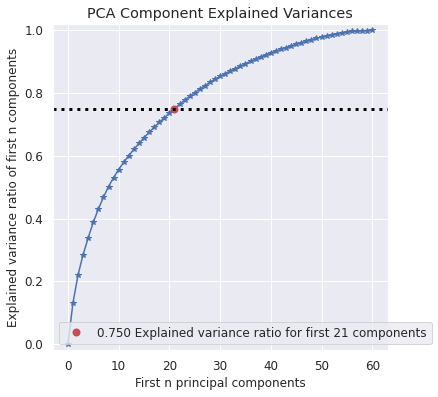

In [15]:
# interject, try this other plotting library
pca = PCA()
pca.fit(X)

skplt.decomposition.plot_pca_component_variance(pca, figsize=(6,6));

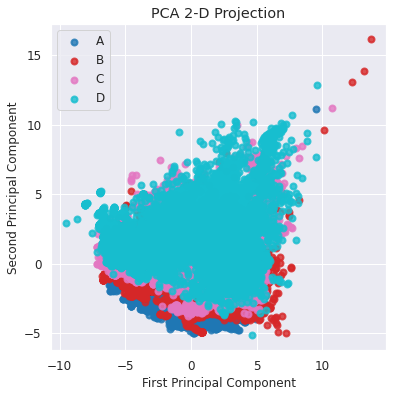

In [14]:
Y = X_combined['Y']
skplt.decomposition.plot_pca_2d_projection(pca, X, Y,
                                           figsize=(6,6),
                                           cmap="tab10");

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca = PCA(n_components=6)

In [ ]:
pca = PCA(n_components=9)

In [ ]:
pca.fit(X)

PCA(n_components=9)

In [ ]:
print(pca.explained_variance_ratio_)

[0.13153039 0.08933254 0.06455601 0.05333723 0.04929258 0.04224764
 0.03747888 0.03427422 0.02834828]


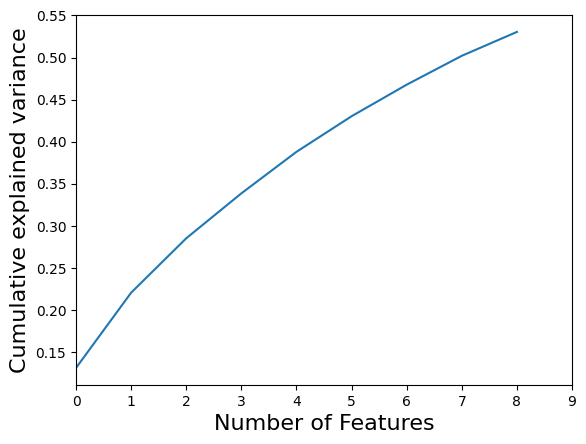

In [ ]:

var_ratio = pca.explained_variance_ratio_
components = pca.components_
#print(pca.explained_variance_)
plt.plot(np.cumsum(var_ratio))
plt.xlim(0,9,1)
plt.xlabel('Number of Features', fontsize=16)
plt.ylabel('Cumulative explained variance', fontsize=16)
plt.show()

In [ ]:
print(pca.singular_values_)

[605.70866432 499.17817217 424.34547324]


In [17]:
X_reduced = PCA(n_components=3).fit_transform(X)

In [20]:
print('Shape before PCA: ', X.shape)
print('Shape after PCA: ',X_reduced.shape)


Shape before PCA:  (46489, 60)
Shape after PCA:  (46489, 3)


In [19]:
pca_df = pd.DataFrame(
    data=X_reduced, 
    columns=['PC1', 'PC2', 'PC3'])

In [21]:
pca_df

,PC1,PC2,PC3
0,-5.117090,2.099491,-1.267045
1,1.463116,3.507005,-1.701176
2,-1.327410,-0.063853,-0.024938
3,2.421695,3.122959,-1.338965
4,3.128381,2.802746,-1.572465
...,...,...,...
46484,1.187298,-2.905670,-0.996217
46485,0.632345,-3.068935,-2.651065
46486,0.645811,-3.109308,-2.588926
46487,0.716478,-3.119183,-2.396740


In [22]:
pca_df['target'] = X_combined['Y']

In [23]:
pca_df

,PC1,PC2,PC3,target
0,-5.117090,2.099491,-1.267045,D
1,1.463116,3.507005,-1.701176,D
2,-1.327410,-0.063853,-0.024938,D
3,2.421695,3.122959,-1.338965,D
4,3.128381,2.802746,-1.572465,D
...,...,...,...,...
46484,1.187298,-2.905670,-0.996217,A
46485,0.632345,-3.068935,-2.651065,A
46486,0.645811,-3.109308,-2.588926,A
46487,0.716478,-3.119183,-2.396740,A


In [ ]:
# The explained variance, or eigenvalue, in PCA shows the variance that can be attributed to each of the principal components.
pca.explained_variance_

array([7.89199333, 5.36006814, 3.87345295])

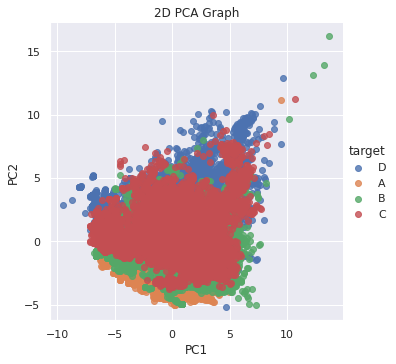

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

In [ ]:
X_reduced[:,0]

array([-5.11709209,  1.46311876, -1.32741005, ...,  0.64581001,
        0.71647719,  0.62592978])

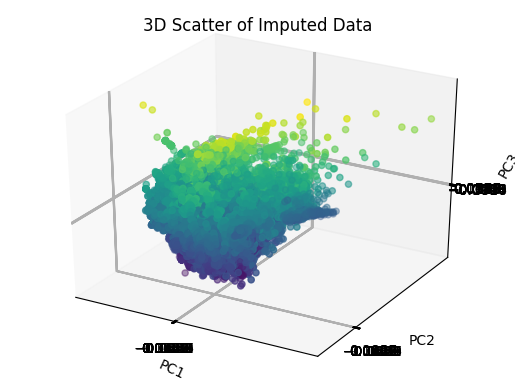

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
from mpl_toolkits import mplot3d
plt.style.use('default')
 
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]

# xdata = X_reduced[:,0]
# ydata = X_reduced[:,1]
# zdata = X_reduced[:,2]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
 
# Plot title of graph
plt.title(f'3D Scatter of Imputed Data')
 
# Plot x, y, z even ticks
ticks = np.linspace(-0.1, 0.1, num=15)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
 
# Plot x, y, z labels
ax.set_xlabel('PC1', rotation=-25) #orig 150
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', rotation=60) # orig 60


plt.show()

In [ ]:
# from mpl_toolkits.mplot3d import axes3d

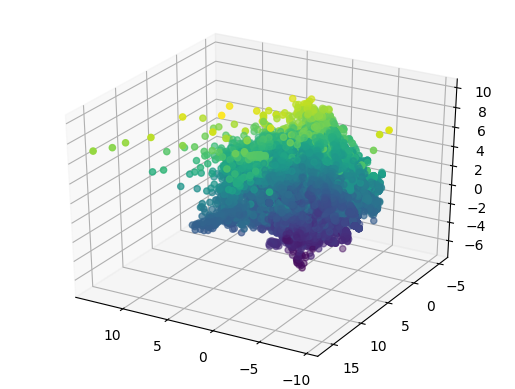

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(30, 120)
plt.draw()
plt.pause(.1)

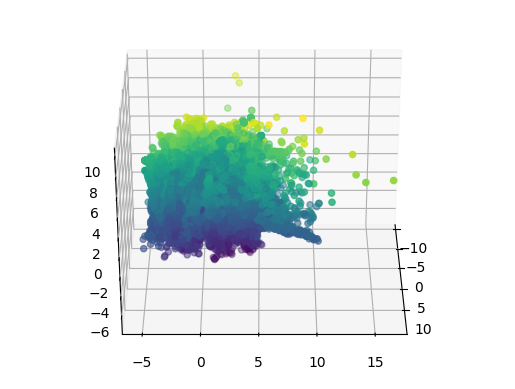

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(30, 0)
plt.draw()
plt.pause(.1)

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

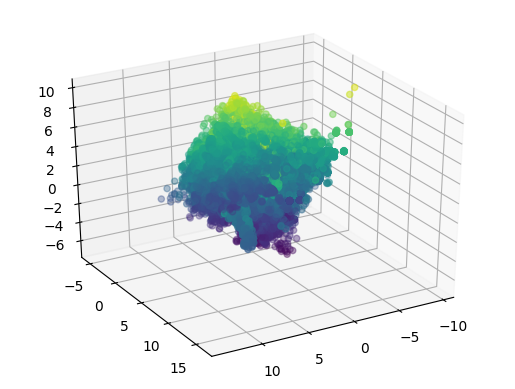

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(30, 60)
plt.draw()
plt.pause(.1)

In [ ]:
labels = X_combined['Y'].values.tolist()
labels = set(labels)
labels = list(labels)
labels

['A', 'D', 'C', 'B']

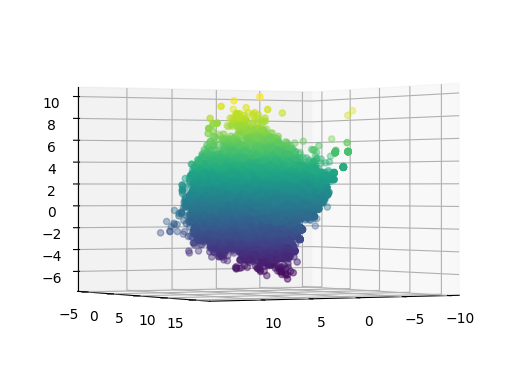

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(0, 60)
plt.draw()
plt.pause(.1)

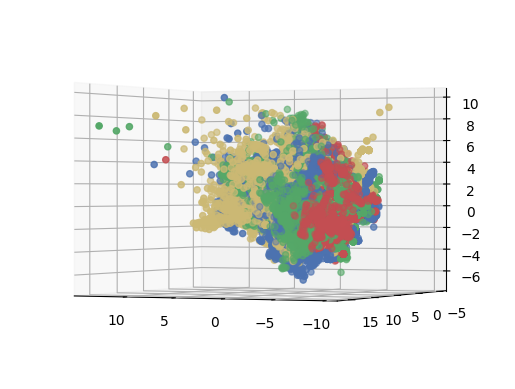

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(0, 115)
plt.draw()
plt.pause(.1)

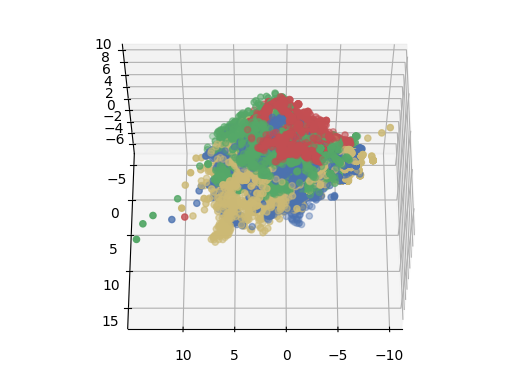

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(60, 90)
plt.draw()
plt.pause(.1)

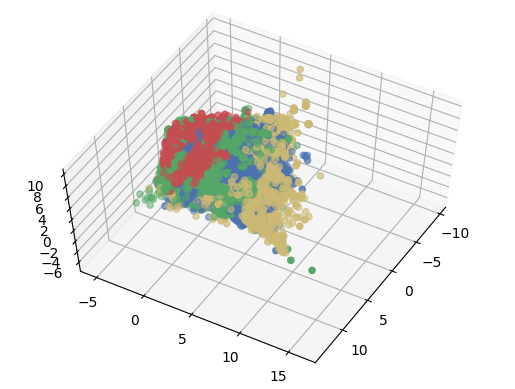

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(60, 30)
plt.draw()
plt.pause(.1)

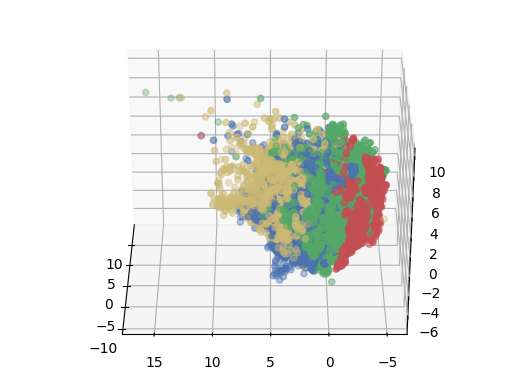

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(30, 180)
plt.draw()
plt.pause(.1)

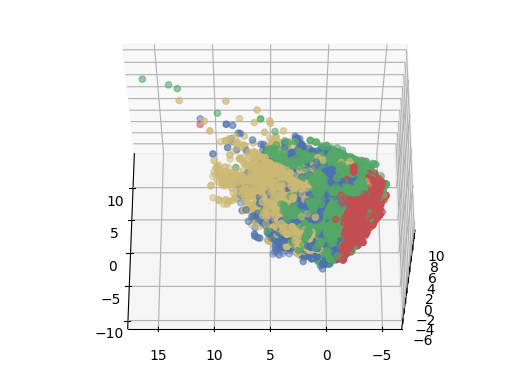

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(60, 180)
plt.draw()
plt.pause(.1)

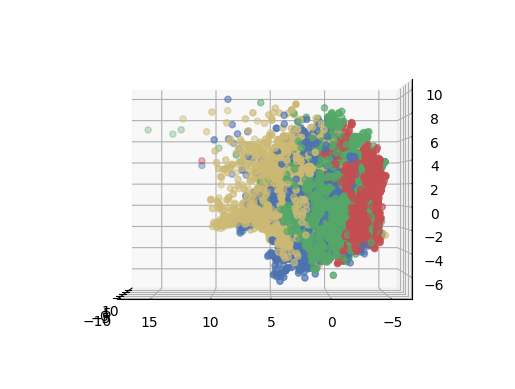

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(0, 180)
plt.draw()
plt.pause(.1)

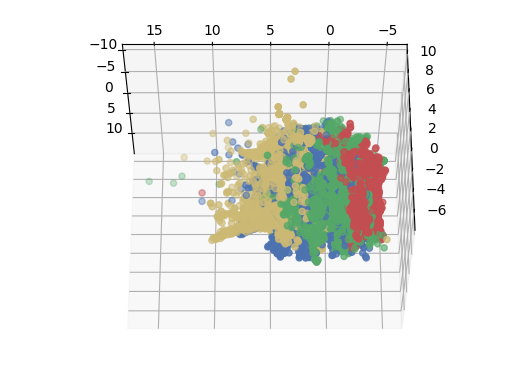

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(-30, 180)
plt.draw()
plt.pause(.1)

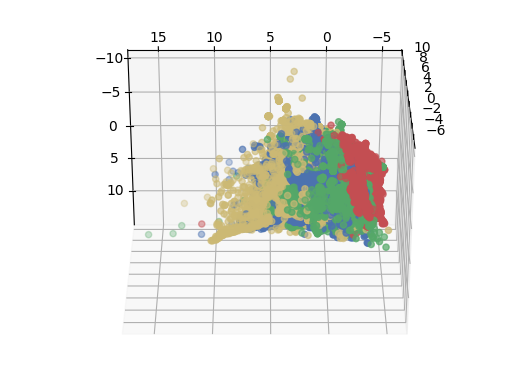

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(-60, 180)
plt.draw()
plt.pause(.1)

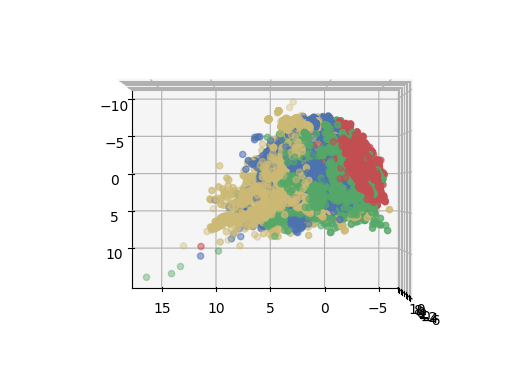

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(-90, 180)
plt.draw()
plt.pause(.1)

In [25]:
import matplotlib.patches as mpatches

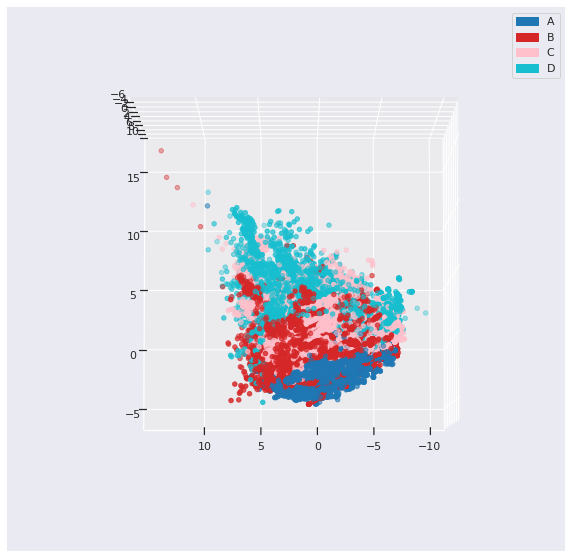

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]

legend_dict = {'A':'tab:blue','B':'tab:red','C':'pink','D':'tab:cyan'}

c=pca_df['target'].map(legend_dict)
ax.scatter3D(xdata, ydata, zdata, c=c)

patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
ax.view_init(-95, 90)
# plt.rcParams["figure.figsize"] = (10,10)
plt.rc('figure', figsize=(10, 10))
plt.draw()
plt.pause(.1)

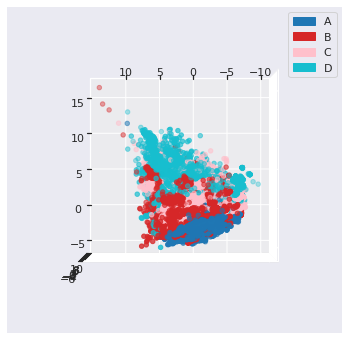

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]

legend_dict = {'A':'tab:blue','B':'tab:red','C':'pink','D':'tab:cyan'}

c=pca_df['target'].map(legend_dict)
ax.scatter3D(xdata, ydata, zdata, c=c)

patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
ax.view_init(-90, 90)
# plt.rcParams["figure.figsize"] = (10,10)
plt.rc('figure', figsize=(6, 6))
plt.draw()
plt.pause(.1)

In [43]:
plt.rcParams["figure.figsize"] = (8,8)
plt.rc('figure', figsize=(8, 8))

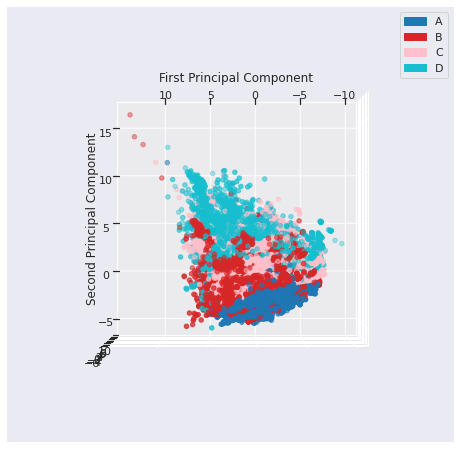

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]

legend_dict = {'A':'tab:blue','B':'tab:red','C':'pink','D':'tab:cyan'}

c=pca_df['target'].map(legend_dict)
ax.scatter3D(xdata, ydata, zdata, c=c)

patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
ax.view_init(-90, 90)
plt.draw()
plt.pause(.1)

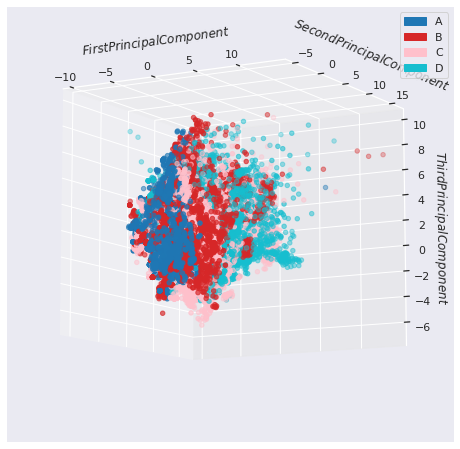

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]

legend_dict = {'A':'tab:blue','B':'tab:red','C':'pink','D':'tab:cyan'}

c=pca_df['target'].map(legend_dict)
ax.scatter3D(xdata, ydata, zdata, c=c)

ax.set_xlabel('$First Principal Component$', fontsize=12, rotation=150)
ax.set_ylabel('$Second Principal Component$')
ax.set_zlabel(r'$Third Principal Component$', fontsize=12, rotation=60)
ax.yaxis._axinfo['label']['space_factor'] = 3.0

patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
ax.view_init(-10)
plt.draw()
plt.pause(.1)

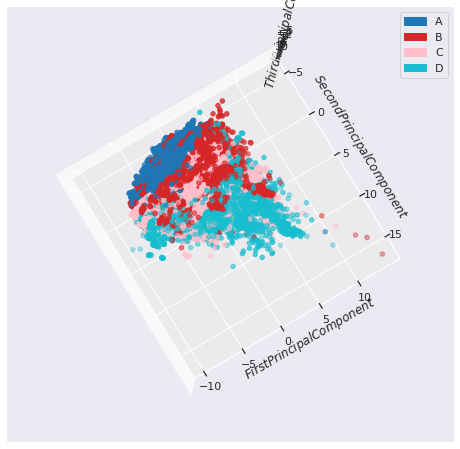

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]

legend_dict = {'A':'tab:blue','B':'tab:red','C':'pink','D':'tab:cyan'}

c=pca_df['target'].map(legend_dict)
ax.scatter3D(xdata, ydata, zdata, c=c)

ax.set_xlabel('$First Principal Component$', fontsize=12, rotation=150)
ax.set_ylabel('$Second Principal Component$')
ax.set_zlabel(r'$Third Principal Component$', fontsize=12, rotation=60)
ax.yaxis._axinfo['label']['space_factor'] = 3.0

patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
ax.view_init(-90)
plt.draw()
plt.pause(.1)

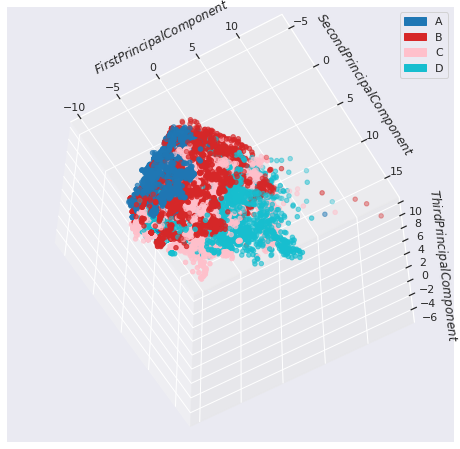

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]

legend_dict = {'A':'tab:blue','B':'tab:red','C':'pink','D':'tab:cyan'}

c=pca_df['target'].map(legend_dict)
ax.scatter3D(xdata, ydata, zdata, c=c)

ax.set_xlabel('$First Principal Component$', fontsize=12, rotation=150)
ax.set_ylabel('$Second Principal Component$')
ax.set_zlabel(r'$Third Principal Component$', fontsize=12, rotation=60)
ax.yaxis._axinfo['label']['space_factor'] = 3.0

patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
ax.view_init(-60)
plt.draw()
plt.pause(.1)

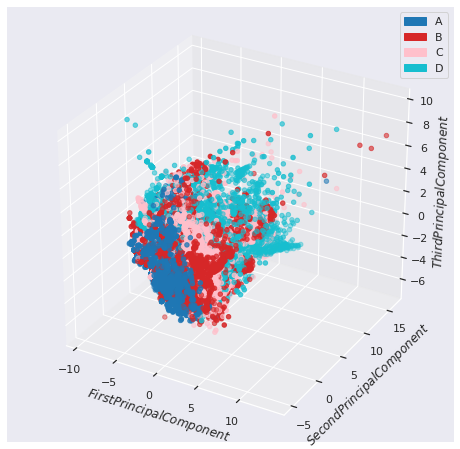

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]

legend_dict = {'A':'tab:blue','B':'tab:red','C':'pink','D':'tab:cyan'}

c=pca_df['target'].map(legend_dict)
ax.scatter3D(xdata, ydata, zdata, c=c)

ax.set_xlabel('$First Principal Component$', fontsize=12, rotation=150)
ax.set_ylabel('$Second Principal Component$')
ax.set_zlabel(r'$Third Principal Component$', fontsize=12, rotation=60)
ax.yaxis._axinfo['label']['space_factor'] = 3.0

patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
ax.view_init()
plt.draw()
plt.pause(.1)

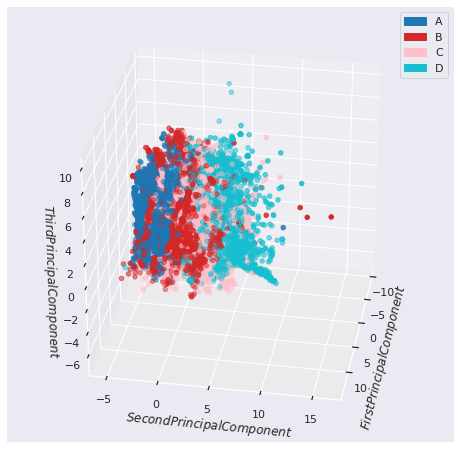

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]

legend_dict = {'A':'tab:blue','B':'tab:red','C':'pink','D':'tab:cyan'}

c=pca_df['target'].map(legend_dict)
ax.scatter3D(xdata, ydata, zdata, c=c)

ax.set_xlabel('$First Principal Component$', fontsize=12, rotation=150)
ax.set_ylabel('$Second Principal Component$')
ax.set_zlabel(r'$Third Principal Component$', fontsize=12, rotation=60)
ax.yaxis._axinfo['label']['space_factor'] = 3.0

patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
ax.view_init(None,10)
plt.draw()
plt.pause(.1)

In [63]:
import matplotlib.lines as mlines


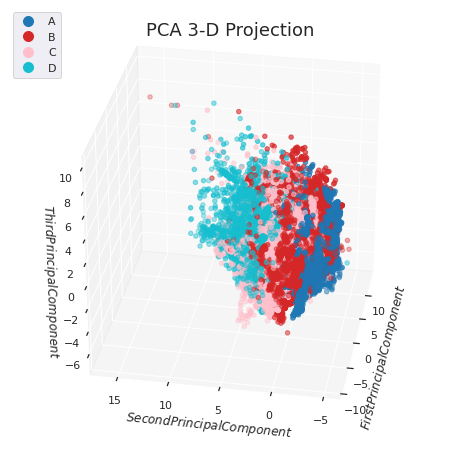

In [75]:
fig = plt.figure(facecolor="white")
ax = fig.add_subplot(111, projection='3d')

xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]

legend_dict = {'A':'tab:blue','B':'tab:red','C':'pink','D':'tab:cyan'}

c=pca_df['target'].map(legend_dict)
ax.scatter3D(xdata, ydata, zdata, c=c)

ax.set_xlabel('$First Principal Component$', fontsize=12, rotation=150)
ax.set_ylabel('$Second Principal Component$')
ax.set_zlabel(r'$Third Principal Component$', fontsize=12, rotation=60)
ax.yaxis._axinfo['label']['space_factor'] = 3.0

patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
ax.view_init(None,-170)
ax.set_facecolor("white")
plt.title("PCA 3-D Projection",fontsize=18)

blue_star = mlines.Line2D([], [], color='tab:blue', marker='o', linestyle='None',
                          markersize=10, label='A')
red_square = mlines.Line2D([], [], color='tab:red', marker='o', linestyle='None',
                          markersize=10, label='B')
purple_triangle = mlines.Line2D([], [], color='pink', marker='o', linestyle='None',
                          markersize=10, label='C')
purple2_triangle = mlines.Line2D([], [], color='tab:cyan', marker='o', linestyle='None',
                          markersize=10, label='D')


plt.legend(handles=[blue_star, red_square, purple_triangle, purple2_triangle], loc="upper left")

plt.draw()
plt.pause(.1)

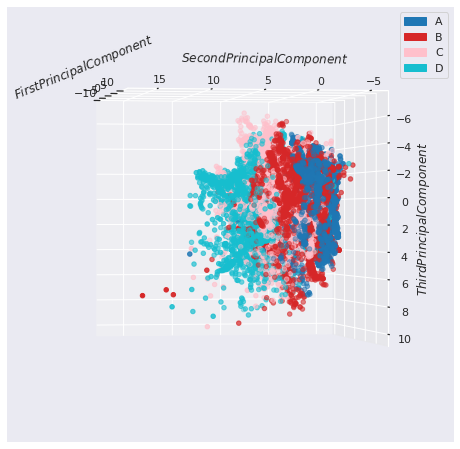

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]

legend_dict = {'A':'tab:blue','B':'tab:red','C':'pink','D':'tab:cyan'}

c=pca_df['target'].map(legend_dict)
ax.scatter3D(xdata, ydata, zdata, c=c)

ax.set_xlabel('$First Principal Component$', fontsize=12, rotation=150)
ax.set_ylabel('$Second Principal Component$')
ax.set_zlabel(r'$Third Principal Component$', fontsize=12, rotation=60)
ax.yaxis._axinfo['label']['space_factor'] = 3.0

patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
ax.view_init(180,-170)
plt.draw()
plt.pause(.1)

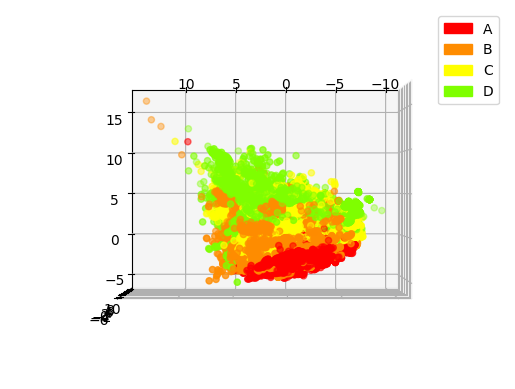

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

legend_dict = {'A':'red','B':'darkorange','C':'yellow','D':'chartreuse'}

c=pca_df['target'].map(legend_dict)
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(-90, 90)
plt.draw()
plt.pause(.1)

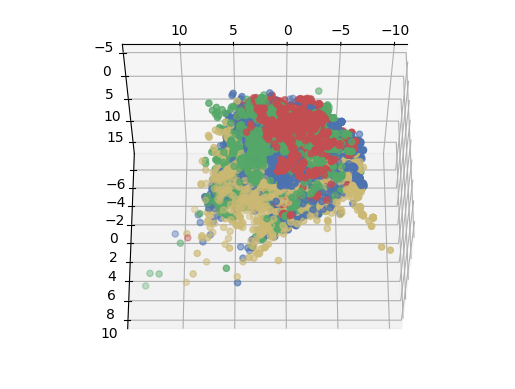

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(-210, 90)
plt.draw() 
plt.pause(.1)

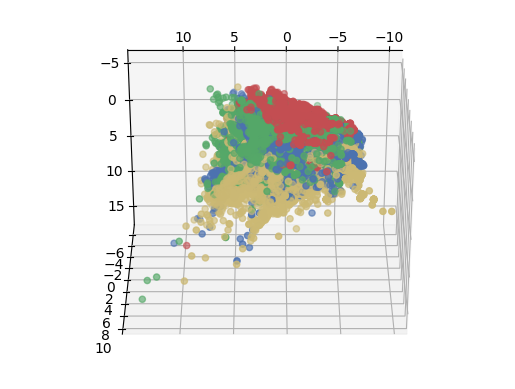

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(-240, 90)
plt.draw() 
plt.pause(.1)

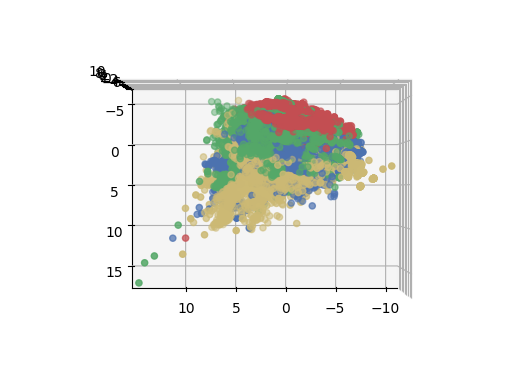

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(-270, 90)
plt.draw() 
plt.pause(.1)

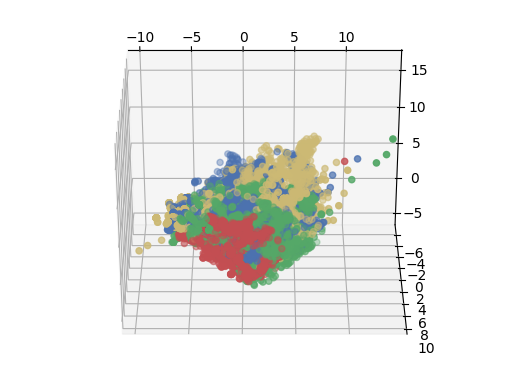

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(-300, 90)
plt.draw() 
plt.pause(.1)

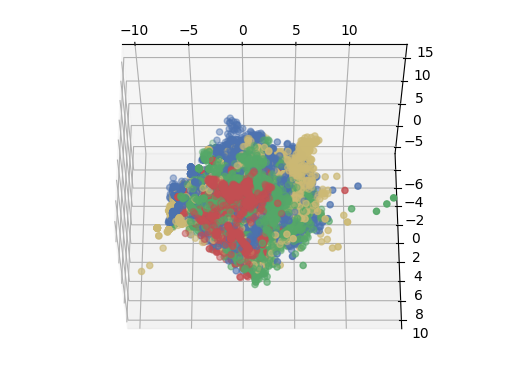

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# c=new_data['target'].map({'Clas1':'r','Clas2':'g','Clas3':'b'})

# load some test data for demonstration and plot a wireframe
xdata = X_reduced[:,0]
ydata = X_reduced[:,1]
zdata = X_reduced[:,2]
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# Plot 3D plot

c=pca_df['target'].map({'A':'r','B':'g','C':'b','D':'y'})
ax.scatter3D(xdata, ydata, zdata, c=c)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# # rotate the axes and update
# for angle in range(0, 10):
# range 0...10
ax.view_init(-330, 90)
plt.draw() 
plt.pause(.1)

ValueError: ignored

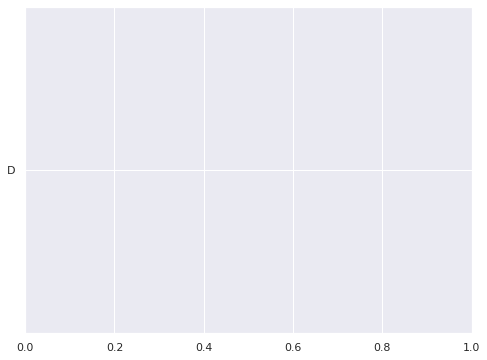

In [ ]:
y = X_combined['Y']

# x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
# y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X, y, c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

Now, that we have our imputed dataframe, try k-means classifier


In [ ]:
# define groups
groups = df['iso_code'].values
n_splits = 10

ValueError: ignored

In [ ]:
X = X_combined.loc[:, X_combined.columns != 'Y']
Y = X_combined['Y']

Y.shape, X.shape

((46489,), (46489, 60))

In [ ]:
sgkf = StratifiedGroupKFold(n_splits=10)

for train, test in enumerate(sgkf.split(X, Y, groups=groups)):
  print("%s %s" % (train, test))
  x_train_grouped, x_test_grouped = X.values[train_index], X.values[test_index]
  y_train_grouped, y_test_grouped = Y.values[train_index],Y.values[test_index]


  # DATA must be scaled in KNN classifier

  model = KNeighborsClassifier(n_neighbors=15, weights='distance')

  # Train the model using the training sets
  model.fit(x_train_grouped,y_train_grouped)

  #Predict Output
  y_pred = model.predict(x_test_grouped)
  acc = accuracy_score(y_pred, y_test_grouped)
  report = classification_report(y_pred, y_test_grouped)
  print('report:', report, sep='\n')



0 (array([    0,     1,     2, ..., 46486, 46487, 46488]), array([  991,   992,   993, ..., 44269, 44270, 44271]))
report:
              precision    recall  f1-score   support

           A       0.66      0.79      0.72      1336
           B       0.34      0.19      0.24      1574
           C       0.28      0.38      0.32       969
           D       0.56      0.62      0.59       755

    accuracy                           0.47      4634
   macro avg       0.46      0.50      0.47      4634
weighted avg       0.46      0.47      0.45      4634

1 (array([    0,     1,     2, ..., 46486, 46487, 46488]), array([ 1536,  1537,  1538, ..., 44574, 44575, 44576]))
report:
              precision    recall  f1-score   support

           A       0.66      0.79      0.72      1336
           B       0.34      0.19      0.24      1574
           C       0.28      0.38      0.32       969
           D       0.56      0.62      0.59       755

    accuracy                           0.47    

In [ ]:
# with scaling the data it looks better

Let's try to just use Hist Gradient Boost Classifier first, 

Note the categorical features should be specified, and may be specified by index among others.
gbdt = HistGradientBoostingClassifier(categorical_features=[0])

In [ ]:
# gbdt = HistGradientBoostingClassifier(categorical_features=[0,1,2])

In [ ]:
df['owid_gdp_per_capita'].describe

<bound method NDFrame.describe of 72       35973.781
78       35973.781
79       35973.781
80       35973.781
81       35973.781
           ...    
64670     1899.775
64671     1899.775
64672     1899.775
64673     1899.775
64674     1899.775
Name: owid_gdp_per_capita, Length: 46489, dtype: float64>

In [ ]:
# make some classes
# get the median of the dataframe

A = df['owid_gdp_per_capita'].quantile(q=0.25)
B = df['owid_gdp_per_capita'].quantile(q=0.5)
C = df['owid_gdp_per_capita'].quantile(q=0.75)

A, B, C

(5321.444, 14048.881, 31400.84)

In [ ]:
# assign class
# make a new column with the median split, if the movie rating is lower, assign 0, else assign 1

# base
df['Y'] = ''

# if the column value is less than A, assign 'A'
df.loc[df[gdp_col] <= A, 'Y'] = 'A'
df.loc[( (df[gdp_col] > A) & (df[gdp_col] <= B) ), 'Y'] = 'B'
df.loc[( (df[gdp_col] > B) & (df[gdp_col] <= C) ), 'Y'] = 'C'
# df.loc[( (df[gdp_col] > C) & (df[gdp_col] <= D) ), 'Y'] = 'D'
# df.loc[df[gdp_col] > D, 'Y'] = 'E'
df.loc[df[gdp_col] > C, 'Y'] = 'D'

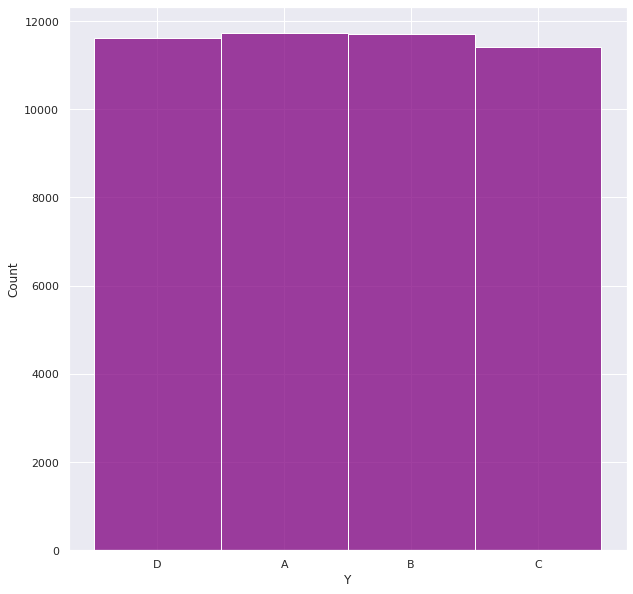

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.histplot(df['Y'], color="purple")
# plt.plot(random_classifier, random_classifier, 'r--')
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.title("ROC Curve: %s" % movie)
plt.show()

# looking pretty balanced now! great.

In [ ]:
# split into train/test
df['Y'].describe()

count     46489
unique        4
top           A
freq      11739
Name: Y, dtype: object

In [ ]:
# change iso code from categorical to numeric index
df['iso_code'] = pd.factorize(df['iso_code'])[0]
df

,iso_code,country,date,jhu_confirmed,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests_per_thousand,...,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_workplaces,sdsn_new_deaths_per_million_smoothed,sdsn_overall_transmission,Y
72,0,Aruba,2020-03-13,NaN,0.0,18.733,18.733,NaN,0.000,NaN,...,NaN,NaN,NaN,40.0,-4.0,-5.0,3.0,NaN,NaN,D
78,0,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.0,-41.0,-40.0,-40.0,NaN,NaN,D
79,0,Aruba,2020-03-20,NaN,0.0,37.465,18.733,NaN,0.000,NaN,...,NaN,NaN,NaN,-7.0,-41.0,-45.0,-41.0,NaN,NaN,D
80,0,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-19.0,-52.0,-54.0,-40.0,NaN,NaN,D
81,0,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-36.0,-52.0,-62.0,-46.0,NaN,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,183,Zimbabwe,2020-10-26,8303.0,1.0,556.822,0.471,15.946,0.067,9.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033571,1.0,A
64671,183,Zimbabwe,2020-10-27,8315.0,5.0,558.638,1.817,16.282,0.336,9.292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0,A
64672,183,Zimbabwe,2020-10-28,8320.0,0.0,559.446,0.807,16.282,0.000,9.330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0,A
64673,183,Zimbabwe,2020-10-29,8349.0,0.0,559.782,0.336,16.282,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052786,1.0,A


In [ ]:
# now that i made iso_code numeric, drop all non-numerics

In [ ]:
drop_cols = [gdp_col]
# drop_cols = []

# don't have to drop iso_code anymore, i made it a numerical category
drop_cols.extend(['date','country','owid_tests_units'])

df.drop(drop_cols, axis=1, inplace=True)
# train_df.drop(drop_cols, axis=1, inplace=True)
# test_df.drop(drop_cols, axis=1, inplace=True)


Now that I assigned a new class variable, i can drop the previous numeric column (which could be used for regression, i suppose)

In [ ]:
import random

def make_split(M,pct,seed):

    print("picking %s percent of country codes" % pct)
    all_codes = df['iso_code'].unique().tolist()
    total = float(len(all_codes))
    
    num_picked = round(pct * total)
    print("must pick %s / %s = %s " % (pct, total, num_picked))

    random.seed(seed)   # ensure this can be replicated later
    test = random.sample(all_codes, k=num_picked) # sample works without replacement
    test = sorted(test)
    
    print("test:")
    print(test)
    test_df = M.loc[M['iso_code'].isin(test)]
    # print(test_df)

    s = set(test)
    train = [x for x in all_codes if x not in s]

    print("train:")
    print(train)
    train_df = M.loc[M['iso_code'].isin(train)]
    # print(train_df)
    
    return test_df, train_df

In [ ]:
# # now, split into train test
pct = 0.2
seed = 12
test_df, train_df = make_split(df,pct,seed)

picking 0.2 percent of country codes
must pick 0.2 / 184.0 = 37 
test:
[0, 2, 4, 15, 19, 22, 36, 37, 41, 51, 53, 57, 58, 68, 70, 86, 89, 94, 95, 97, 103, 112, 117, 121, 123, 130, 131, 135, 142, 147, 153, 158, 159, 160, 164, 168, 170]
train:
[1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 92, 93, 96, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119, 120, 122, 124, 125, 126, 127, 128, 129, 132, 133, 134, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 148, 149, 150, 151, 152, 154, 155, 156, 157, 161, 162, 163, 165, 166, 167, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]


# USE GROUPKFOLD

using groups as cross validation as not to overfit

In [ ]:
# ok, so attempt to set up 

In [ ]:
# Y = df['Y'] # WRONG SHAPES
# X = df[:-1]
X = df.loc[:, df.columns != 'Y']
Y = df['Y']

Y.shape, X.shape

((46489,), (46489, 61))

In [ ]:
from sklearn.model_selection import GroupKFold, StratifiedGroupKFold, GridSearchCV

# GroupKFold assures that the whole group goes either to the train or to the test set

In [ ]:
# dont group by class, group by iso_code

# groups = df['Y'].values
groups = df['iso_code'].values

In [ ]:
# Cannot have number of splits n_splits=10 greater than the number of groups: 4
n_splits = 10

group_kfold = GroupKFold(n_splits=n_splits)
group_kfold.get_n_splits(X, Y, groups)

10

In [ ]:
group_kfold.split(X, Y, groups)
for i, (train_index, test_index) in enumerate(group_kfold.split(X, Y, groups=groups)):
  print("Fold %s" % i)
  print(f"  Train: index={train_index}, group={groups[train_index]}")
  print(f"  Test:  index={test_index}, group={groups[test_index]}")

  # accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)



Fold 0
  Train: index=[    0     1     2 ... 46486 46487 46488], group=[  0   0   0 ... 183 183 183]
  Test:  index=[ 4199  4200  4201 ... 45769 45770 45771], group=[ 16  16  16 ... 180 180 180]
Fold 1
  Train: index=[    0     1     2 ... 46486 46487 46488], group=[  0   0   0 ... 183 183 183]
  Test:  index=[ 2066  2067  2068 ... 44269 44270 44271], group=[  8   8   8 ... 174 174 174]
Fold 2
  Train: index=[  227   228   229 ... 46486 46487 46488], group=[  1   1   1 ... 183 183 183]
  Test:  index=[    0     1     2 ... 41700 41701 41702], group=[  0   0   0 ... 163 163 163]
Fold 3
  Train: index=[    0     1     2 ... 46486 46487 46488], group=[  0   0   0 ... 183 183 183]
  Test:  index=[ 3194  3195  3196 ... 45030 45031 45032], group=[ 12  12  12 ... 177 177 177]
Fold 4
  Train: index=[    0     1     2 ... 46262 46263 46264], group=[  0   0   0 ... 182 182 182]
  Test:  index=[ 1536  1537  1538 ... 46486 46487 46488], group=[  6   6   6 ... 183 183 183]
Fold 5
  Train: index=[  

In [ ]:
cls = HistGradientBoostingClassifier()

In [ ]:
# Variables for average classification report
originalclass = []
predictedclass = []

parameters = {
    # "loss":["deviance"],
    "verbose" : [True],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    }

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


In [ ]:
accuracies = []

sgkf = StratifiedGroupKFold(n_splits=10)

for train, test in enumerate(sgkf.split(X, Y, groups=groups)):
  print("%s %s" % (train, test))

  x_train_grouped, x_test_grouped = X.values[train_index], X.values[test_index]
  y_train_grouped, y_test_grouped = Y.values[train_index],Y.values[test_index]

  classifier = HistGradientBoostingClassifier()
  classifier.fit(x_train_grouped,y_train_grouped)

  # gridsearch may not have support for groups in cv.
  # # Non_nested parameter search and scoring
  # clf = GridSearchCV(estimator=cls, param_grid=parameters, cv=sgkf, groups=groups)
  # clf.fit(x_train_grouped, y_train_grouped)
  # print(clf_gbm.best_params_)
  # print(clf_gbm.best_score_)

  y_pred = classifier.predict(x_test_grouped)
  acc = accuracy_score(y_pred, y_test_grouped)
  # print("Accuracy of the model is: %.3f" % acc)

  report = classification_report(y_pred, y_test_grouped)
  print('report:', report, sep='\n')

  # accuracies.append(acc)

0 (array([    0,     1,     2, ..., 46486, 46487, 46488]), array([  991,   992,   993, ..., 44269, 44270, 44271]))
report:
              precision    recall  f1-score   support

           A       0.85      0.69      0.76      1974
           B       0.36      0.37      0.36       818
           C       0.39      0.68      0.50       775
           D       1.00      0.78      0.87      1067

    accuracy                           0.65      4634
   macro avg       0.65      0.63      0.62      4634
weighted avg       0.72      0.65      0.67      4634

1 (array([    0,     1,     2, ..., 46486, 46487, 46488]), array([ 1536,  1537,  1538, ..., 44574, 44575, 44576]))
report:
              precision    recall  f1-score   support

           A       0.85      0.69      0.76      1974
           B       0.36      0.28      0.31      1096
           C       0.19      0.50      0.27       497
           D       1.00      0.78      0.87      1067

    accuracy                           0.59    

In [ ]:
average_accuracy = sum(accuracies)

In [ ]:
est = HistGradientBoostingClassifier()
est.get_params().keys()

dict_keys(['categorical_features', 'early_stopping', 'l2_regularization', 'learning_rate', 'loss', 'max_bins', 'max_depth', 'max_iter', 'max_leaf_nodes', 'min_samples_leaf', 'monotonic_cst', 'n_iter_no_change', 'random_state', 'scoring', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:

n_splits = 10

gkf = GroupKFold(n_splits=n_splits)

In [ ]:
# gkf = GroupKFold(n_splits=n_folds)

# for fold, (idx_train, idx_val) in enumerate(gkf.split(X, y, groups=groups))
#     X_train, y_train = X[idx_train, :], y[idx_train, :]
#     X_valid, y_valid = X[idx_val, :], y[idx_val, :]

#     accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

# # cv = GroupKFold()
# # test_score = cross_val_score(model, data, target, groups=groups, cv=cv,
# #                              n_jobs=2)
# # print(f"The average accuracy is "
# #       f"{test_score.mean():.3f} ± "
# #       f"{test_score.std():.3f}")

In [ ]:
X_train.shape, Y_train.shape

((37045, 61), (37045,))

In [ ]:
# evaluate the model
model = HistGradientBoostingClassifier()

cv = StratifiedGroupKFold(shuffle=True, n_splits=20)


n_scores = cross_val_score(model, X_train, Y_train, scoring='neg_root_mean_squared_error', cv=cv, groups=groups, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ValueError: ignored

In [ ]:
sorted(sklearn.metrics.SCORERS.keys())

NameError: ignored

In [ ]:
# now isolate the x and y values
X_train = train_df.loc[:, train_df.columns != 'Y']
Y_train = train_df['Y']

X_test = test_df.loc[:, test_df.columns != 'Y']
Y_test = test_df['Y']

X_train.shape, X_test.shape

((37045, 61), (9444, 61))

In [ ]:
train_df.isna().sum().sum()

831838

In [ ]:
test_df.isna().sum().sum()

185692

In [ ]:
# KNN requires scaling of data because KNN uses 
# the Euclidean distance between two data points to find nearest neighbors. 
# Euclidean distance is sensitive to magnitudes. 
# The features with high magnitudes will weight more than features with low magnitudes.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# train_df.columns.tolist()

In [ ]:
# hm i guess we need to drop the text columns
# date, country_iso, country
pd.set_option('display.max_rows', 100)


In [ ]:
# # ok so that parameters should i have put? default? lol i guess.

# classifier =  HistGradientBoostingClassifier()
# classifier.fit(X_train,Y_train)

HistGradientBoostingClassifier()

In [ ]:
# classifier.get_params()

{'categorical_features': None,
 'early_stopping': 'auto',
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'auto',
 'max_bins': 255,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': None,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# tuning for num neighbors
k_list = [3,5,15] # best so far at 0.5, val score = 0.645

for k in k_list:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)

    print("Neighbors: ", k)
    # print("" % l2_regularization)
    print("Accuracy score (training): {0:.3f}".format(knn_classifier.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(knn_classifier.score(X_test, Y_test)))

ValueError: ignored

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
# try with weights=distance


In [ ]:
knn_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# cv_results_gbdt

{'fit_time': array([11.01447654, 11.07566476, 10.89361358, 10.57934475,  7.71518683]),
 'score_time': array([0.40583777, 0.40666008, 0.39425874, 0.39546585, 0.26108408]),
 'test_score': array([nan, nan, nan, nan, nan])}

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array(['C', 'D', 'D', ..., 'D', 'B', 'B'], dtype=object)

In [ ]:
print("Accuracy of the model is: %.3f" % accuracy_score(y_pred, Y_test))

Accuracy of the model is: 0.568


In [ ]:
## Confusion Matrix for the predicted outputs
conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix

array([[2832,    0,    0,  242],
       [ 898,  846,  238,  248],
       [   0,  476,  404,  979],
       [   0,  413,  587, 1281]])

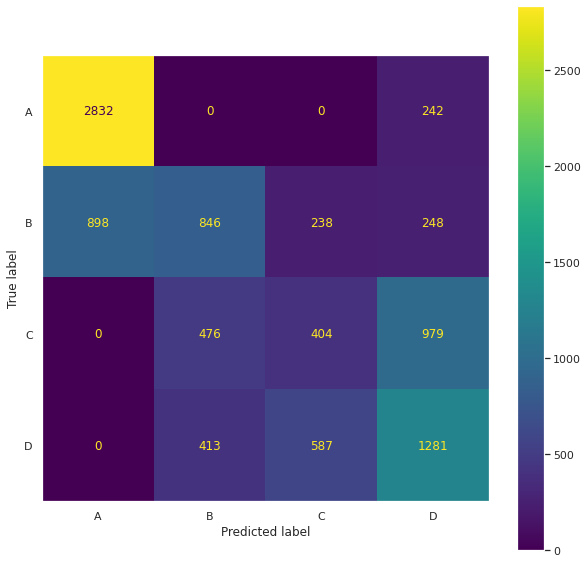

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier.classes_)
disp.plot()
plt.grid()
plt.show()

In [ ]:
confusion_matrix(Y_test, y_pred, normalize="true").diagonal()

array([0.92127521, 0.3793722 , 0.21732114, 0.56159579])

In [ ]:
report = classification_report(Y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           A       0.76      0.92      0.83      3074
           B       0.49      0.38      0.43      2230
           C       0.33      0.22      0.26      1859
           D       0.47      0.56      0.51      2281

    accuracy                           0.57      9444
   macro avg       0.51      0.52      0.51      9444
weighted avg       0.54      0.57      0.55      9444



# Review

Its terrible at predicting the middle classes, decently good at predicting the highest and the lowest GDP brackets (classes)